In [1]:
# Confluence: https://datarobot.atlassian.net/wiki/spaces/CFDS/pages/671023248/Time+Series
# - Start here:  https://datarobot.atlassian.net/wiki/spaces/CFDS/pages/671023248/Time+Series
# - FAQ:  https://datarobot.atlassian.net/wiki/spaces/CFDS/pages/323486025/Time+Series+FAQ
# - Resources:  https://datarobot.atlassian.net/wiki/spaces/CFDS/pages/911114609/Time+Series+Resources

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
from pprint import pprint

pd.options.display.max_columns = 100

# Constants
DATE_COL = "Date"
TARGET = "Sales"
SERIES_ID = "Department" # THIS needs to be a single column

In [2]:
# Read training and prediction files
d = pd.read_excel("./data/time_series_poc_certification_training.csv.xlsx", parse_dates=[DATE_COL])
d.sort_values(by=DATE_COL, ascending=True, inplace=True)
d.shape

pred = pd.read_excel("./data/time_series_poc_certification_prediction.csv.xlsx", parse_dates=[DATE_COL])
pred.sort_values(by=DATE_COL, ascending=True, inplace=True)

d.head()

,Department,Date,Sales,Department_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
0,Athletic Clothing,2012-04-01,80874,2060,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
1484,Beauty,2012-04-01,41834,1890,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
2224,Beverages,2012-04-01,22954,2050,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
3731,"Camera, Photo, and Video",2012-04-01,54724,1952,17,0.811287,158,8.713822,In Store Credit Card Signup Discount; Spring P...,No,0.030232,0.780263,NaN,-0.025092
5251,Childrens Fashion,2012-04-01,41811,1940,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092


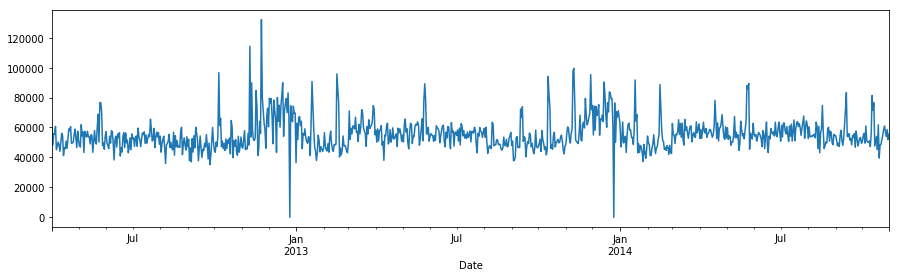

In [3]:
# Plot the mean sales by date across all departments
fig, ax= plt.subplots(1,1,figsize=(15,4))
d.groupby(DATE_COL).mean()[TARGET].plot(ax=ax)

# This groupby ^ really just creates hierarchical labels, 
# since there is only one value per dept per day, so there is no mean. (I think)
# print(d.groupby([DATE_COL, SERIES_ID]).max()[TARGET])
# print('\n...is same as\n')
# print(d.groupby([DATE_COL, SERIES_ID]).mean()[TARGET])

Department,Athletic Clothing,Bathing Suits,Beauty,Beverages,Bluetooth and Wireless Speakers,"Camera, Photo, and Video",Cell Phones and Accessories,Childrens Fashion,Computer Parts and Components,Computers and Tablets,"Dairy, Cheese, and Eggs",Electronics,Fruit and Vegetables,Headphones,Lawn and Garden,Meat and Seafood,Mens Fashion,Pet Supplies,Snack Foods,Sports Equipment,TV and Video,Toys and Games,Video Games,Womens Fashion
Date,,,,,,,,,,,,,,,,,,,,,,,,
2012-04-01,80874.0,81787.0,41834.0,22954.0,NaN,54724.0,NaN,41811.0,31417.0,19552.0,23529.0,36395.0,NaN,NaN,NaN,22792.0,40671.0,NaN,NaN,NaN,160857.0,66903.0,181214.0,40202.0
2012-04-02,80532.0,82971.0,41283.0,15622.0,37174.0,57193.0,NaN,40132.0,31160.0,26332.0,15726.0,32791.0,15396.0,23924.0,80545.0,15673.0,41648.0,NaN,15468.0,83173.0,NaN,60738.0,177219.0,40791.0
2012-04-03,82474.0,80946.0,42028.0,NaN,36839.0,59870.0,34870.0,40561.0,26408.0,24684.0,15301.0,44689.0,15170.0,NaN,80199.0,15310.0,41568.0,40832.0,15730.0,83159.0,151164.0,66067.0,192251.0,40377.0
2012-04-04,83639.0,82389.0,40323.0,20410.0,36290.0,60162.0,34728.0,NaN,NaN,22903.0,20178.0,NaN,20057.0,21280.0,81618.0,20052.0,41690.0,41469.0,NaN,NaN,132525.0,49522.0,191147.0,NaN
2012-04-05,81763.0,83932.0,41763.0,18220.0,45313.0,73095.0,38665.0,40268.0,40707.0,NaN,18358.0,44967.0,18011.0,NaN,83758.0,NaN,40168.0,40107.0,NaN,81778.0,NaN,83495.0,218827.0,NaN
2012-04-06,81082.0,80392.0,40113.0,17929.0,48273.0,74305.0,41590.0,41152.0,NaN,33335.0,17758.0,51187.0,18006.0,27195.0,80374.0,17728.0,NaN,NaN,18333.0,NaN,NaN,82484.0,NaN,40661.0
2012-04-07,82190.0,82945.0,41214.0,22856.0,40901.0,55416.0,36511.0,40979.0,28260.0,29989.0,NaN,39592.0,23114.0,20186.0,81354.0,22606.0,41426.0,41693.0,NaN,NaN,130412.0,49126.0,NaN,41020.0
2012-04-08,NaN,80930.0,41880.0,23652.0,40065.0,NaN,29652.0,41195.0,21601.0,NaN,22990.0,38604.0,23435.0,19881.0,83686.0,23395.0,41531.0,40994.0,23466.0,80104.0,131129.0,55603.0,149034.0,42017.0
2012-04-09,80984.0,83547.0,40191.0,15509.0,NaN,56201.0,30856.0,NaN,25201.0,NaN,15845.0,28096.0,15167.0,18160.0,81821.0,15584.0,40792.0,41349.0,15854.0,NaN,110194.0,55424.0,151449.0,41814.0


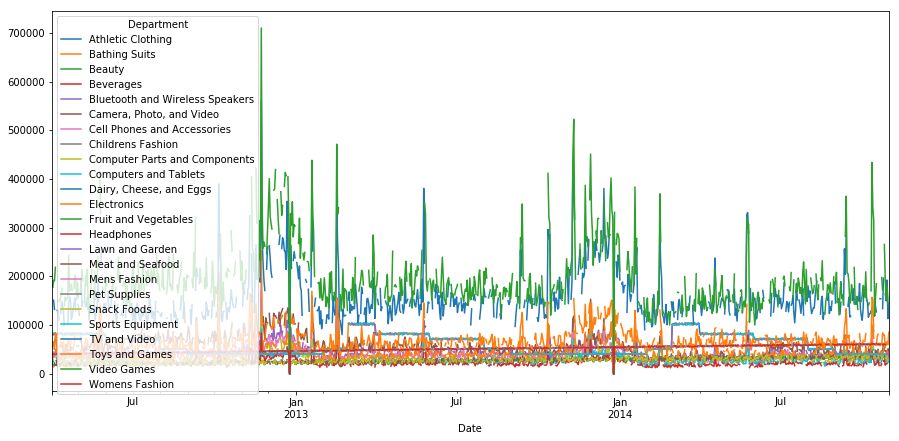

In [4]:
# Group by date and department, print and plot
fig, ax = plt.subplots(figsize=(15,7))
# unstack(), aka pivot, the inner level of multilevel row index to the columns
d.groupby([DATE_COL, SERIES_ID]).mean()[TARGET].unstack().plot(ax=ax)
d.groupby([DATE_COL, SERIES_ID]).mean()[TARGET].unstack().head(10)

In [5]:
# Fill in missing dates in the time series for each department
def fill_missing_dates(group):
    '''
    Reindex a group series with a new filled date range
    '''
    date_range = pd.date_range(group.index.min(), group.index.max(), freq='D')
    group = group.reindex(date_range)
    return group

# d_filled_date_range = d.set_index(DATE_COL).groupby(SERIES_ID).apply(fill_missing_dates).rename_axis((SERIES_ID, DATE_COL)).drop(SERIES_ID, axis=1).reset_index()

# Fill in the missing days for each group (will be NaNs)
d_filled_date_range = d.set_index(DATE_COL).groupby(SERIES_ID).apply(fill_missing_dates) 
# Set the name of the rows axis so the date index has the name 'Date', 
# drop the department name, and reset the index to mode the date to column
d_filled_date_range = d_filled_date_range.rename_axis((SERIES_ID, DATE_COL)).drop(SERIES_ID, axis=1).reset_index()

# Do the same with the prediction file
pred_filled_date_range = pred.set_index(DATE_COL).groupby(SERIES_ID).apply(fill_missing_dates) 
pred_filled_date_range = pred_filled_date_range.rename_axis((SERIES_ID, DATE_COL)).drop(SERIES_ID, axis=1).reset_index()

d_filled_date_range.head(10)

,Department,Date,Sales,Department_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
0,Athletic Clothing,2012-04-01,80874.0,2060.0,31.0,0.760756,371.0,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
1,Athletic Clothing,2012-04-02,80532.0,2060.0,33.0,0.781784,308.0,5.835458,In Store Credit Card Signup Discount; Spring P...,No,0.028092,NaN,NaN,NaN
2,Athletic Clothing,2012-04-03,82474.0,2060.0,65.0,0.444975,386.0,6.180215,In Store Credit Card Signup Discount; Spring P...,No,0.029847,NaN,NaN,NaN
3,Athletic Clothing,2012-04-04,83639.0,2060.0,67.0,0.836780,364.0,7.149818,In Store Credit Card Signup Discount; Spring P...,No,0.028064,NaN,NaN,NaN
4,Athletic Clothing,2012-04-05,81763.0,2060.0,65.0,0.991318,567.0,10.323724,In Store Credit Card Signup Discount; Spring P...,No,0.030224,NaN,NaN,NaN
5,Athletic Clothing,2012-04-06,81082.0,2060.0,65.0,0.605925,709.0,8.392068,In Store Credit Card Signup Discount; Spring P...,No,0.030482,NaN,4300.0,NaN
6,Athletic Clothing,2012-04-07,82190.0,2060.0,68.0,0.342021,491.0,9.113846,In Store Credit Card Signup Discount; Spring P...,No,0.038417,NaN,NaN,NaN
7,Athletic Clothing,2012-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Athletic Clothing,2012-04-09,80984.0,2060.0,45.0,0.059526,223.0,10.039990,In Store Credit Card Signup Discount; Spring P...,No,0.037888,NaN,NaN,NaN
9,Athletic Clothing,2012-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Experiment with different ways to handle the filled NaN dates
# - keep as NaN, 0 fill, ffill

d_filled_date_range.to_csv('data/TS Training with_filled_in_Dates.csv', index=False)
pred_filled_date_range.to_csv('data/TS Testing with_filled_in_Dates.csv', index=False)

d_filled_date_range_0_fill = d_filled_date_range.fillna(0)
d_filled_date_range_0_fill.to_csv('data/TS Training with_filled_in_Dates_0_fill.csv', index=False)
pred_filled_date_range_0_fill = d_filled_date_range.fillna(0)
pred_filled_date_range_0_fill.to_csv('data/TS Testing with_filled_in_Dates_0_fill.csv', index=False)

d_filled_date_range_fwd_fill = d_filled_date_range.fillna(method='ffill')
d_filled_date_range_fwd_fill.to_csv('data/TS Training with_filled_in_Dates_fwd_fill.csv', index=False)
pred_filled_date_range_fwd_fill = d_filled_date_range.fillna(0)
pred_filled_date_range_fwd_fill.to_csv('data/TS Testing with_filled_in_Dates_fwd_fill.csv', index=False)

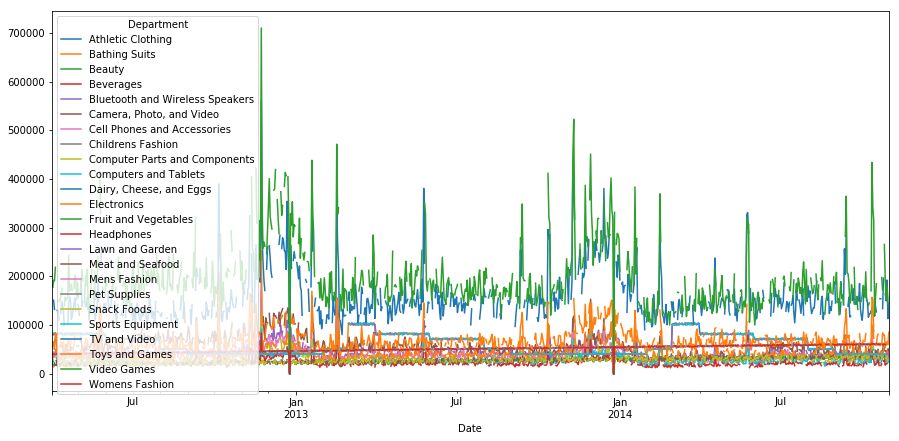

In [7]:
# Plot data after dates are filled in the series
fig, ax = plt.subplots(figsize=(15,7))
# use unstack() - it's not visually clear that there's a difference between this and the plot above
d_filled_date_range.groupby([DATE_COL, SERIES_ID]).mean()[TARGET].unstack().plot(ax=ax)

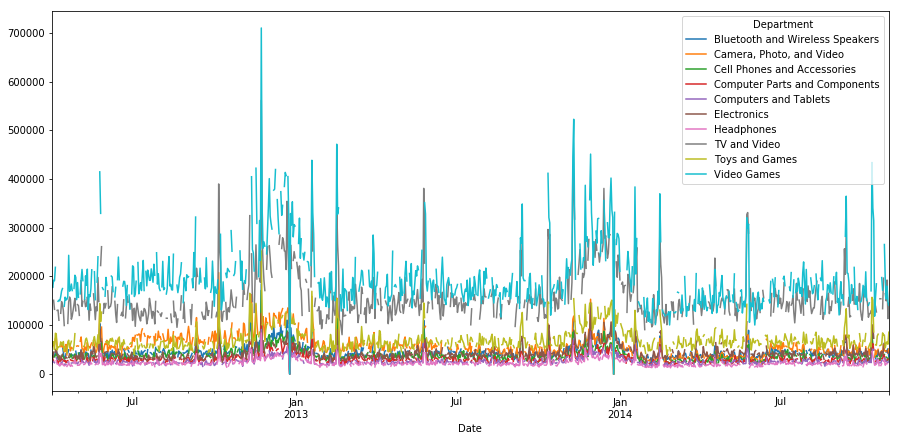

In [9]:
c0 = ['Bluetooth and Wireless Speakers', 'Camera, Photo, and Video',
       'Cell Phones and Accessories', 'Computer Parts and Components',
       'Computers and Tablets', 'Electronics', 'Headphones', 'TV and Video',
       'Toys and Games', 'Video Games']
fig, ax = plt.subplots(figsize=(15,7))
# use unstack() - it's not visually clear that there's a difference between this and the plot above
d_filled_date_range.groupby([DATE_COL, SERIES_ID]).mean()[TARGET].unstack()[c0].plot(ax=ax)

## Cluster optimization tests

In [9]:
# Can experiment with NaN fills here too before corr().  Should be the same.
# ffill, then 0 fill NaNs at start of series
# - should be small differences.  Negligible?
d_pivot = d.pivot(index='Date', columns=SERIES_ID, values=TARGET)
d_pivot_fill = d.pivot(index='Date', columns=SERIES_ID, values=TARGET).fillna(method='ffill').fillna(0)

# correlation matrix on filled and non-fillefd NaNs
df = d_pivot.corr()  # has slightly better dendrogram than filled
df_fill = d_pivot_fill.corr()
d.head(10)
d_pivot
df

Department,Athletic Clothing,Bathing Suits,Beauty,Beverages,Bluetooth and Wireless Speakers,"Camera, Photo, and Video",Cell Phones and Accessories,Childrens Fashion,Computer Parts and Components,Computers and Tablets,"Dairy, Cheese, and Eggs",Electronics,Fruit and Vegetables,Headphones,Lawn and Garden,Meat and Seafood,Mens Fashion,Pet Supplies,Snack Foods,Sports Equipment,TV and Video,Toys and Games,Video Games,Womens Fashion
Department,,,,,,,,,,,,,,,,,,,,,,,,
Athletic Clothing,1.000000,0.998212,-0.038962,-0.028730,-0.284940,-0.299237,-0.332438,-0.086405,-0.322633,-0.286168,-0.030852,-0.263809,-0.039551,-0.313075,0.997926,-0.019656,-0.066033,-0.056958,-0.026615,0.998126,-0.263254,-0.249367,-0.306112,-0.025480
Bathing Suits,0.998212,1.000000,-0.015501,-0.028950,-0.298236,-0.292071,-0.339431,-0.078549,-0.332839,-0.272472,-0.038750,-0.241545,-0.058411,-0.292674,0.998025,-0.025808,-0.062962,-0.059128,-0.061671,0.998052,-0.264813,-0.246471,-0.317356,-0.012428
Beauty,-0.038962,-0.015501,1.000000,0.838257,-0.048257,-0.382077,-0.115406,0.987813,-0.056549,0.063786,0.845713,0.219985,0.840618,-0.038015,0.007095,0.834905,0.987663,0.986842,0.837144,0.007317,0.154093,0.133126,-0.078254,0.988487
Beverages,-0.028730,-0.028950,0.838257,1.000000,0.049611,-0.265414,-0.033351,0.845317,0.029740,0.141950,0.996052,0.274858,0.995539,0.029773,-0.003006,0.995660,0.836317,0.823980,0.995441,0.000908,0.181527,0.207710,0.014235,0.839746
Bluetooth and Wireless Speakers,-0.284940,-0.298236,-0.048257,0.049611,1.000000,0.801418,0.903616,-0.076100,0.912503,0.877374,0.064552,0.805264,0.026050,0.901965,-0.286138,0.031142,-0.094199,-0.098379,0.053566,-0.264282,0.883016,0.871659,0.908763,-0.014176
"Camera, Photo, and Video",-0.299237,-0.292071,-0.382077,-0.265414,0.801418,1.000000,0.884723,-0.452201,0.802126,0.687866,-0.283204,0.516656,-0.270613,0.812736,-0.298200,-0.252898,-0.446672,-0.430140,-0.260788,-0.296169,0.666195,0.615947,0.830398,-0.369637
Cell Phones and Accessories,-0.332438,-0.339431,-0.115406,-0.033351,0.903616,0.884723,1.000000,-0.180125,0.909068,0.842248,-0.021681,0.744267,-0.065578,0.910563,-0.316939,-0.031822,-0.178041,-0.182712,-0.023734,-0.320508,0.835439,0.823657,0.915243,-0.092804
Childrens Fashion,-0.086405,-0.078549,0.987813,0.845317,-0.076100,-0.452201,-0.180125,1.000000,-0.078152,0.046397,0.853639,0.185839,0.849612,-0.096897,-0.042138,0.850513,0.986659,0.986221,0.845879,-0.047918,0.086814,0.085160,-0.128058,0.987385
Computer Parts and Components,-0.322633,-0.332839,-0.056549,0.029740,0.912503,0.802126,0.909068,-0.078152,1.000000,0.889828,0.019482,0.816556,0.014821,0.910849,-0.307646,0.019336,-0.086540,-0.098892,0.043311,-0.311125,0.872538,0.866699,0.905148,-0.038052


In [10]:
# df
# df_fill

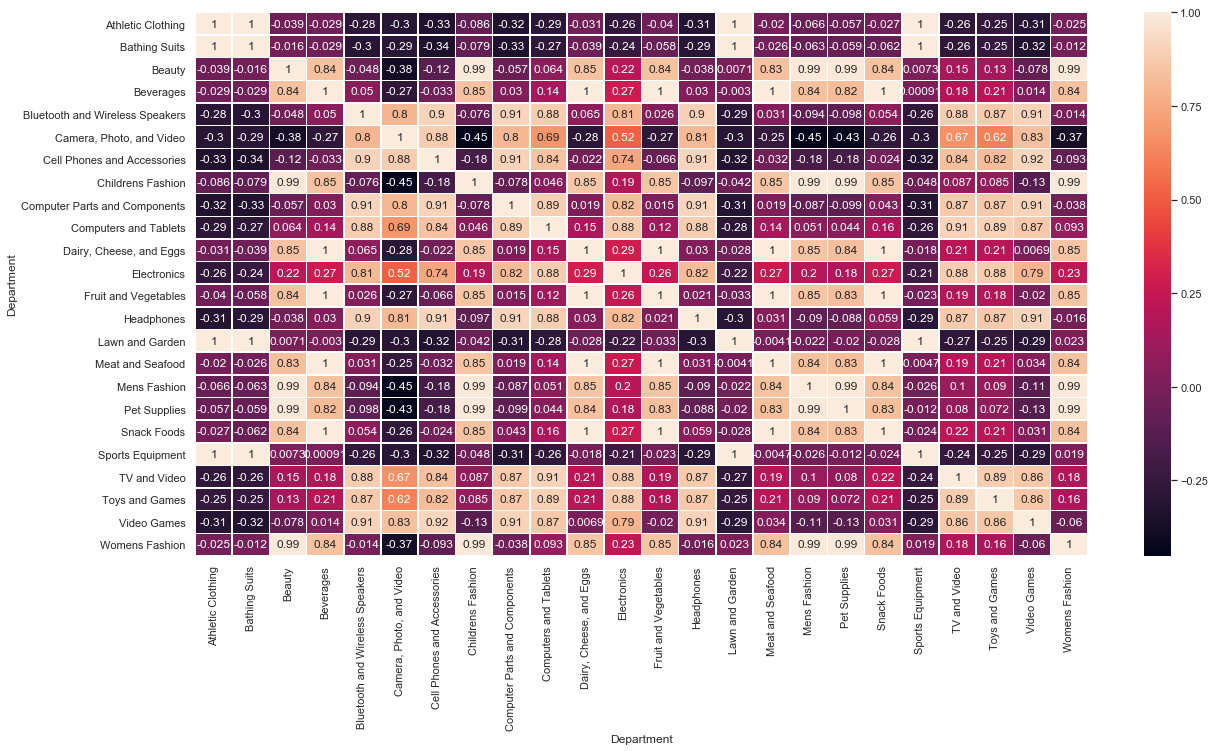

In [11]:
# Correlation heatmap
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df, annot=True, linewidths=.5, ax=ax)

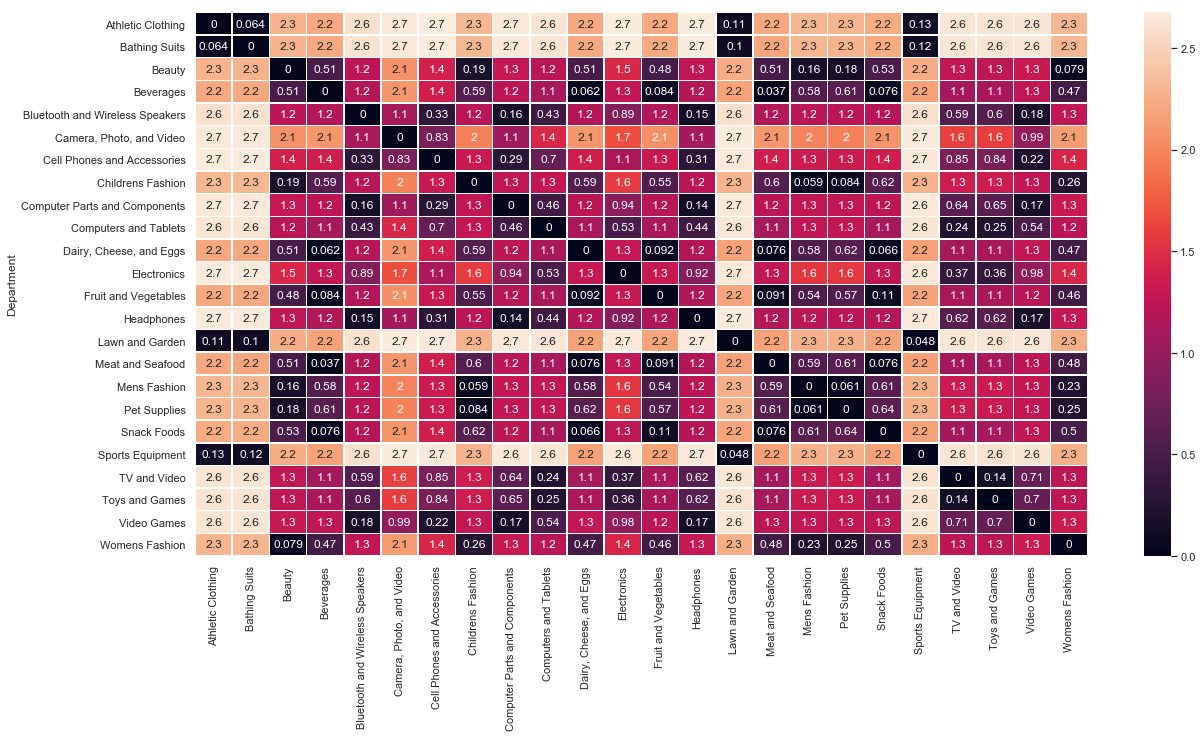

In [12]:
# Dynamic time warping heatmap (inverse of correlation)
import tslearn.metrics as tsl
dtw = tsl.cdist_dtw(df.values)

df_dtw = pd.DataFrame(dtw, columns=df.columns).T
df_dtw.columns = df_dtw.index.values

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_dtw, annot=True, linewidths=.5, ax=ax)

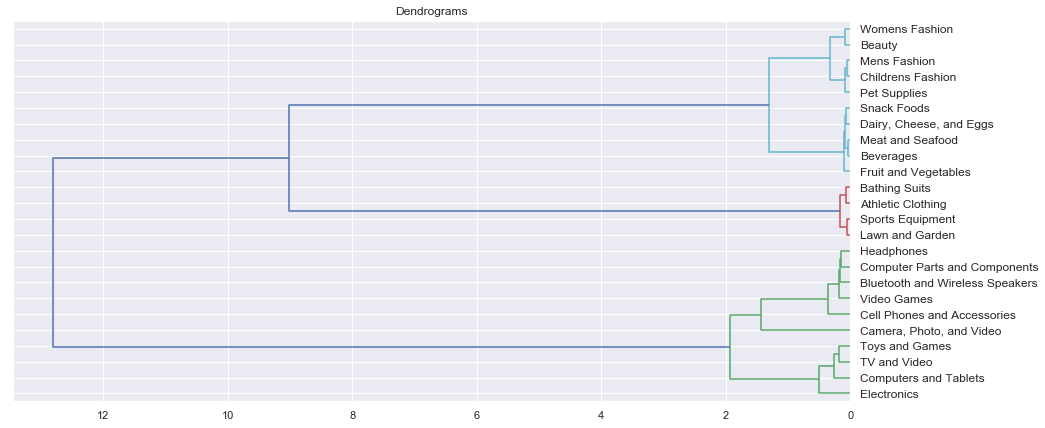

In [13]:
# Hierarchical clustering / dendrogram
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 7))  
plt.title("Dendrograms")  
# dend = shc.dendrogram(shc.linkage(df, method='ward'), leaf_rotation=90, leaf_font_size=12, labels=df.index)
# dend = shc.dendrogram(shc.linkage(df_fill, method='ward'), orientation="left", leaf_font_size=12, labels=df.index)
dend = shc.dendrogram(shc.linkage(df, method='ward'), orientation="left", leaf_font_size=12, labels=df.index)

**********************
Num clusters: 2


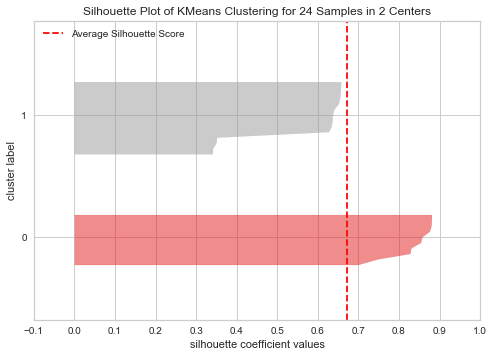

cluster: 0
['Bluetooth and Wireless Speakers' 'Camera, Photo, and Video'
 'Cell Phones and Accessories' 'Computer Parts and Components'
 'Computers and Tablets' 'Electronics' 'Headphones' 'TV and Video'
 'Toys and Games' 'Video Games']

cluster: 1
['Athletic Clothing' 'Bathing Suits' 'Beauty' 'Beverages'
 'Childrens Fashion' 'Dairy, Cheese, and Eggs' 'Fruit and Vegetables'
 'Lawn and Garden' 'Meat and Seafood' 'Mens Fashion' 'Pet Supplies'
 'Snack Foods' 'Sports Equipment' 'Womens Fashion']

Avg sillhouette score for 2 clusters: 0.672

**********************
Num clusters: 3


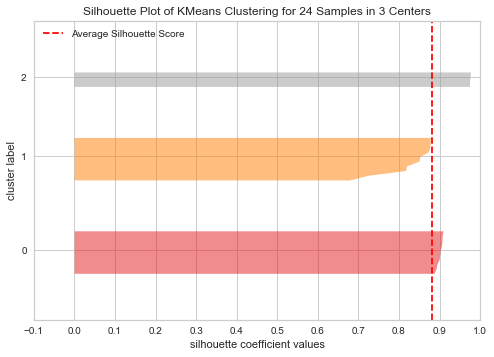

cluster: 0
['Beauty' 'Beverages' 'Childrens Fashion' 'Dairy, Cheese, and Eggs'
 'Fruit and Vegetables' 'Meat and Seafood' 'Mens Fashion' 'Pet Supplies'
 'Snack Foods' 'Womens Fashion']

cluster: 1
['Bluetooth and Wireless Speakers' 'Camera, Photo, and Video'
 'Cell Phones and Accessories' 'Computer Parts and Components'
 'Computers and Tablets' 'Electronics' 'Headphones' 'TV and Video'
 'Toys and Games' 'Video Games']

cluster: 2
['Athletic Clothing' 'Bathing Suits' 'Lawn and Garden' 'Sports Equipment']

Avg sillhouette score for 3 clusters: 0.880

**********************
Num clusters: 4


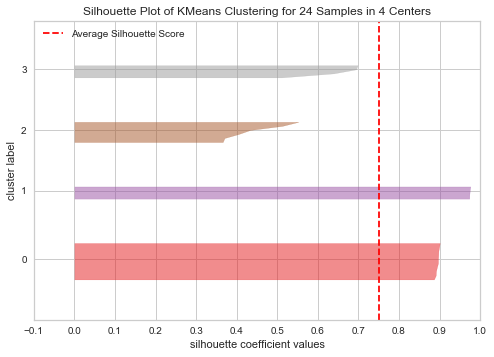

cluster: 0
['Beauty' 'Beverages' 'Childrens Fashion' 'Dairy, Cheese, and Eggs'
 'Fruit and Vegetables' 'Meat and Seafood' 'Mens Fashion' 'Pet Supplies'
 'Snack Foods' 'Womens Fashion']

cluster: 1
['Athletic Clothing' 'Bathing Suits' 'Lawn and Garden' 'Sports Equipment']

cluster: 2
['Bluetooth and Wireless Speakers' 'Camera, Photo, and Video'
 'Cell Phones and Accessories' 'Computer Parts and Components'
 'Headphones' 'Video Games']

cluster: 3
['Computers and Tablets' 'Electronics' 'TV and Video' 'Toys and Games']

Avg sillhouette score for 4 clusters: 0.751

**********************
Num clusters: 5


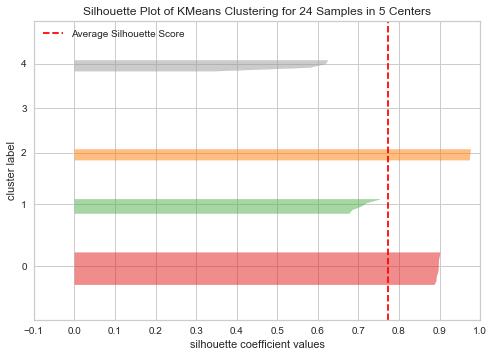

cluster: 0
['Beauty' 'Beverages' 'Childrens Fashion' 'Dairy, Cheese, and Eggs'
 'Fruit and Vegetables' 'Meat and Seafood' 'Mens Fashion' 'Pet Supplies'
 'Snack Foods' 'Womens Fashion']

cluster: 1
['Bluetooth and Wireless Speakers' 'Cell Phones and Accessories'
 'Computer Parts and Components' 'Headphones' 'Video Games']

cluster: 2
['Athletic Clothing' 'Bathing Suits' 'Lawn and Garden' 'Sports Equipment']

cluster: 3
['Camera, Photo, and Video']

cluster: 4
['Computers and Tablets' 'Electronics' 'TV and Video' 'Toys and Games']

Avg sillhouette score for 5 clusters: 0.773

**********************
Num clusters: 6


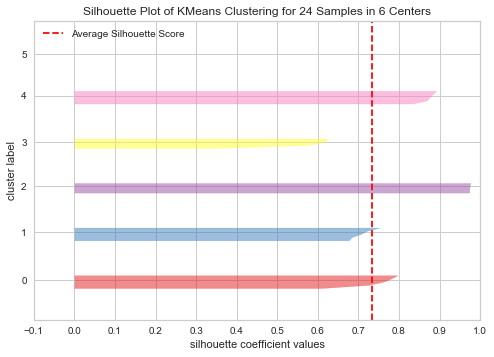

cluster: 0
['Beauty' 'Childrens Fashion' 'Mens Fashion' 'Pet Supplies'
 'Womens Fashion']

cluster: 1
['Bluetooth and Wireless Speakers' 'Cell Phones and Accessories'
 'Computer Parts and Components' 'Headphones' 'Video Games']

cluster: 2
['Athletic Clothing' 'Bathing Suits' 'Lawn and Garden' 'Sports Equipment']

cluster: 3
['Computers and Tablets' 'Electronics' 'TV and Video' 'Toys and Games']

cluster: 4
['Beverages' 'Dairy, Cheese, and Eggs' 'Fruit and Vegetables'
 'Meat and Seafood' 'Snack Foods']

cluster: 5
['Camera, Photo, and Video']

Avg sillhouette score for 6 clusters: 0.734

**********************
Num clusters: 7


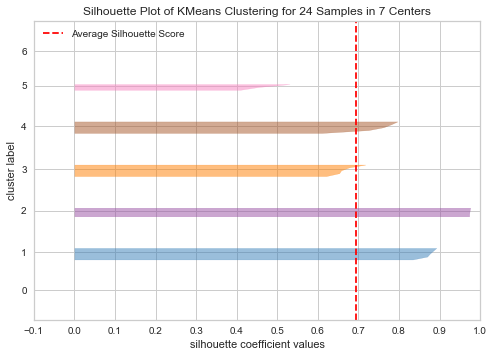

cluster: 0
['Electronics']

cluster: 1
['Beverages' 'Dairy, Cheese, and Eggs' 'Fruit and Vegetables'
 'Meat and Seafood' 'Snack Foods']

cluster: 2
['Athletic Clothing' 'Bathing Suits' 'Lawn and Garden' 'Sports Equipment']

cluster: 3
['Bluetooth and Wireless Speakers' 'Cell Phones and Accessories'
 'Computer Parts and Components' 'Headphones' 'Video Games']

cluster: 4
['Beauty' 'Childrens Fashion' 'Mens Fashion' 'Pet Supplies'
 'Womens Fashion']

cluster: 5
['Computers and Tablets' 'TV and Video' 'Toys and Games']

cluster: 6
['Camera, Photo, and Video']

Avg sillhouette score for 7 clusters: 0.693

**********************
Num clusters: 8


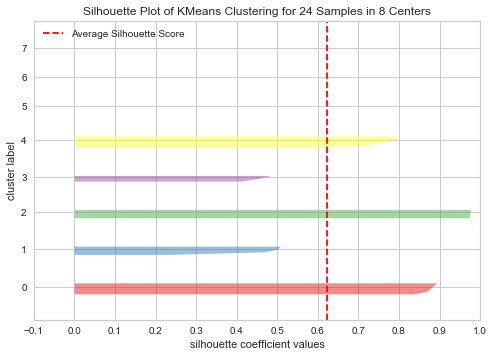

cluster: 0
['Beverages' 'Dairy, Cheese, and Eggs' 'Fruit and Vegetables'
 'Meat and Seafood' 'Snack Foods']

cluster: 1
['Bluetooth and Wireless Speakers' 'Computer Parts and Components'
 'Headphones' 'Video Games']

cluster: 2
['Athletic Clothing' 'Bathing Suits' 'Lawn and Garden' 'Sports Equipment']

cluster: 3
['Computers and Tablets' 'TV and Video' 'Toys and Games']

cluster: 4
['Beauty' 'Childrens Fashion' 'Mens Fashion' 'Pet Supplies'
 'Womens Fashion']

cluster: 5
['Camera, Photo, and Video']

cluster: 6
['Electronics']

cluster: 7
['Cell Phones and Accessories']

Avg sillhouette score for 8 clusters: 0.623

**********************
Num clusters: 9


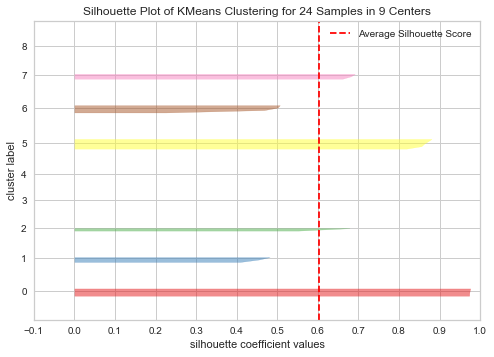

cluster: 0
['Athletic Clothing' 'Bathing Suits' 'Lawn and Garden' 'Sports Equipment']

cluster: 1
['Computers and Tablets' 'TV and Video' 'Toys and Games']

cluster: 2
['Beauty' 'Womens Fashion']

cluster: 3
['Cell Phones and Accessories']

cluster: 4
['Camera, Photo, and Video']

cluster: 5
['Beverages' 'Dairy, Cheese, and Eggs' 'Fruit and Vegetables'
 'Meat and Seafood' 'Snack Foods']

cluster: 6
['Bluetooth and Wireless Speakers' 'Computer Parts and Components'
 'Headphones' 'Video Games']

cluster: 7
['Childrens Fashion' 'Mens Fashion' 'Pet Supplies']

cluster: 8
['Electronics']

Avg sillhouette score for 9 clusters: 0.604

'Average scores:'
{2: 0.672362031649648,
 3: 0.8800947807789073,
 4: 0.7507629901030345,
 5: 0.7726510860625716,
 6: 0.7343220057755212,
 7: 0.6931290394298842,
 8: 0.6233878629349204,
 9: 0.6035234094585523}


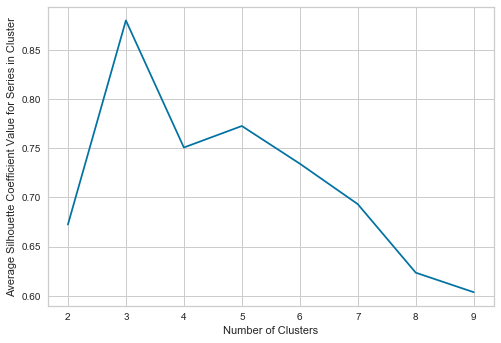

In [14]:
# Kmean and silhouette scores
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

data = np.array([[1,2,3,4,5],[1,0,3,2,4],[4,3,234,5,5],[23,4,5,1,4],[23,5,2,3,5]])
data = df

labels = np.array(['Fiat1', 'Fiat2', 'Mercedes', 'Opel', 'BMW'])
labels = d_pivot.columns

N_CLUSTERS = 9
    
cluster_scores = {}
for num_clusters in range(2, N_CLUSTERS+1):
    print('**********************')
    print('Num clusters:', num_clusters)

    kmeans = SilhouetteVisualizer(KMeans(init='k-means++', n_clusters=num_clusters, n_init=10))
    kmeans.fit(data)
    kmeans.show()
    
    pred_classes = kmeans.predict(data)

    for cluster in range(num_clusters):
        print('cluster: %s' % cluster)
        print(labels[np.where(pred_classes == cluster)].values)
        print()

    print('Avg sillhouette score for %s clusters: %0.3f' % (num_clusters, kmeans.silhouette_samples_.mean()))
    cluster_scores[num_clusters] = kmeans.silhouette_samples_.mean()
    print()
    
pprint('Average scores:')
pprint(cluster_scores)

lists = sorted(cluster_scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Coefficient Value for Series in Cluster')
plt.plot(x, y)
plt.show()

## A cluster of 3 has the best mean silhouette score, and the departments in each cluster are the same as using the top 3 splits in the dendrogram, so using that.

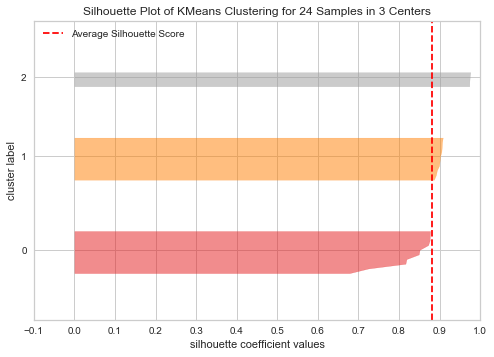

cluster:  0
Index(['Bluetooth and Wireless Speakers', 'Camera, Photo, and Video',
       'Cell Phones and Accessories', 'Computer Parts and Components',
       'Computers and Tablets', 'Electronics', 'Headphones', 'TV and Video',
       'Toys and Games', 'Video Games'],
      dtype='object', name='Department')

cluster:  1
Index(['Beauty', 'Beverages', 'Childrens Fashion', 'Dairy, Cheese, and Eggs',
       'Fruit and Vegetables', 'Meat and Seafood', 'Mens Fashion',
       'Pet Supplies', 'Snack Foods', 'Womens Fashion'],
      dtype='object', name='Department')

cluster:  2
Index(['Athletic Clothing', 'Bathing Suits', 'Lawn and Garden',
       'Sports Equipment'],
      dtype='object', name='Department')



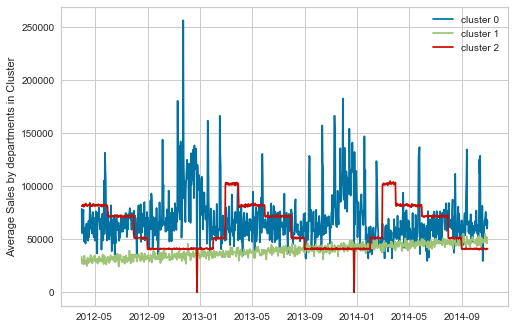

In [15]:
n_clusters = 3

kmeans = SilhouetteVisualizer(KMeans(init='k-means++', n_clusters=n_clusters, n_init=10))
kmeans.fit(data)
kmeans.show()

pred_classes = kmeans.predict(data)

# Get the departments in each cluster and write to file
tmp = ''
for cluster in range(n_clusters):
    print('cluster: ', cluster)
    lbls = labels[np.where(pred_classes == cluster)]
    print(lbls)
    print()
    tmp = lbls
    
    # write to csv
    cfile = d_filled_date_range[d_filled_date_range[SERIES_ID].isin(tmp.values)].set_index(DATE_COL)
    cfile.to_csv('time_series_poc_certification_training_cluster_' + str(cluster) + '.csv')
    pfile = pred_filled_date_range[pred_filled_date_range[SERIES_ID].isin(tmp.values)].set_index(DATE_COL)
    pfile.to_csv('time_series_poc_certification_pred_cluster_' + str(cluster) + '.csv')
    
    # plot it
    plt.plot(cfile.groupby(DATE_COL).mean()[TARGET], label='cluster '+str(cluster))
    
plt.ylabel('Average ' + TARGET + ' by departments in Cluster')
plt.legend()
plt.show()

[2 2 0 4 1 5 8 7 1 3 4 6 4 1 2 4 7 7 4 2 3 3 1 0]


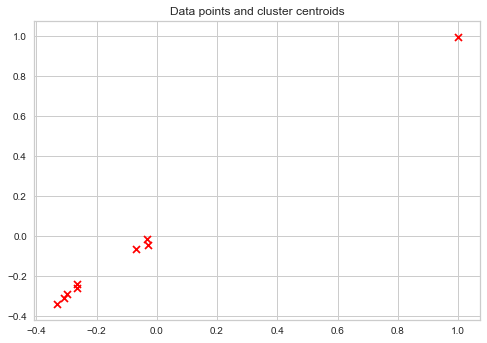

In [16]:
# Using scikit-learn to perform K-Means clustering
    
# Specify the number of clusters (3) and fit the data X
# kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0).fit(df)

# Print the cluster centroid values
# print(kmeans.cluster_centers_)
    
# Print the cluster labels
print(kmeans.labels_)

# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()